In [1]:
import pandas as pd

Loading the tax dataset

In [2]:
kc_tax = pd.read_csv("kc_tax.csv")
kc_tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


Filtering based on variety of criteria

In [3]:
kc_tax_filtered = kc_tax.loc[(kc_tax.TaxAssessedValue> 450000)
                             & (kc_tax.SqFtTotLiving>2000)]
kc_tax_filtered

,TaxAssessedValue,SqFtTotLiving,ZipCode
4,459000.0,3150,98108.0
23,650000.0,2480,98052.0
26,1439000.0,2680,98146.0
27,485000.0,2120,98146.0
28,1134000.0,2460,98136.0
...,...,...,...
498232,711000.0,4290,98056.0
498234,463000.0,2560,98056.0
498235,613000.0,3050,98006.0
498237,1755000.0,2520,98006.0


In [4]:
print (kc_tax_filtered.shape)

(140732, 3)


# Hexagonal binning and contours

plotting numerical data vs numerical data :if number of data points are large then it doesnot matter if we do a scatter plot

Here methods with densities seem to be more useful we use hexagonal binning for this

In [5]:
import matplotlib.pyplot as plt

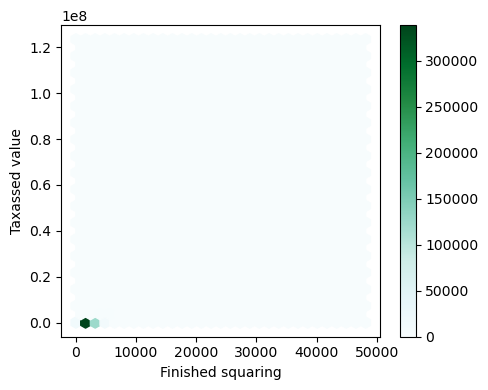

In [6]:
ax = kc_tax.plot.hexbin(x = 'SqFtTotLiving' , y = 'TaxAssessedValue' , gridsize = 30,sharex = False,figsize = (5,4))
ax.set_xlabel('Finished squaring')
ax.set_ylabel('Taxassed value')
plt.tight_layout()
plt.show()

#categorical and numerical values

In [7]:
lc_loans = pd.read_csv("lc_loans.csv")
lc_loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [8]:
# Table 1-8(1)
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [9]:
air_lines = pd.read_csv('airline_stats.csv')
air_lines

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [10]:
air_lines.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


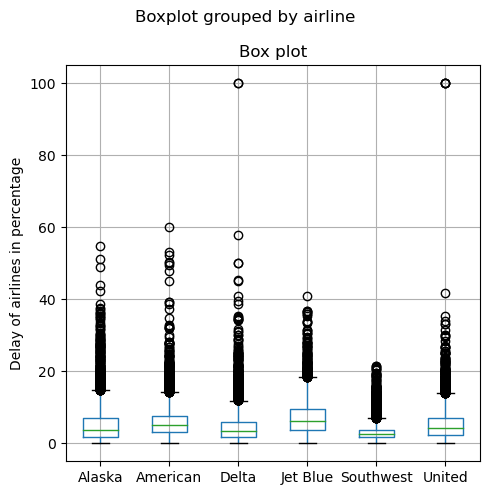

In [13]:
ax = air_lines.boxplot(by='airline',column = 'pct_atc_delay',figsize = (5,5))
ax.set_xlabel('')
ax.set_ylabel('Delay of airlines in percentage')
ax.set_title('Box plot')
plt.tight_layout()
plt.show()

In [17]:
import seaborn as sns

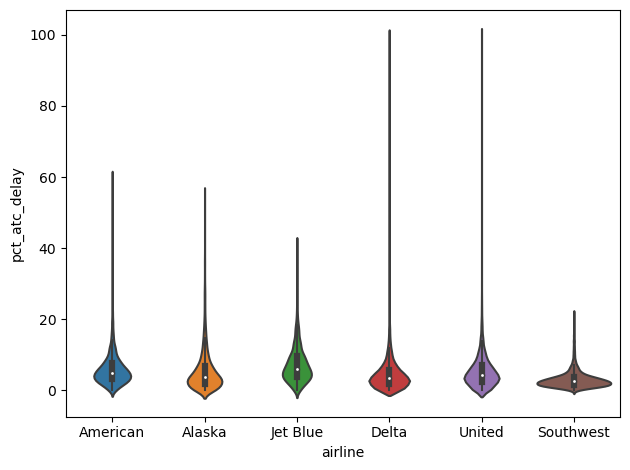

In [24]:
#violin plot
sns.violinplot(data =air_lines,x ='airline',y = 'pct_atc_delay',figsize = (5,5))
ax.set_xlabel('')
ax.set_ylabel('Percentage of delayed flights with airlines')
ax.set_title('Violin plot')
plt.tight_layout()
plt.show()

In [26]:
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [27]:
import numpy as np

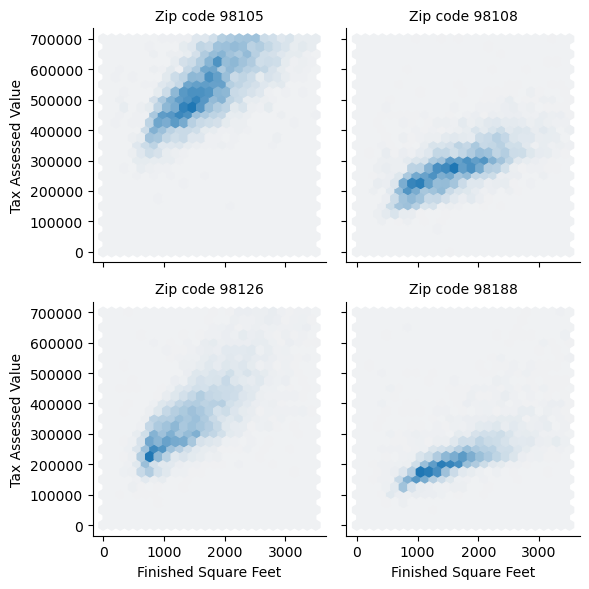

In [36]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax.loc[kc_tax.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()